In [208]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

In [209]:
zip_file_path = 'archive (21).zip'
extracted_dir = 'extracted_data'

In [210]:
os.makedirs(extracted_dir, exist_ok=True)

# Extract the contents of the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir)

In [211]:
import pandas as pd

In [212]:
base_dir = 'extracted_data'
indian_traffic_signs_dir = os.path.join(base_dir, 'Batch-1')
train_dir = indian_traffic_signs_dir

In [213]:
height, width = 128, 128
num_classes = 43 

In [214]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [233]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(height, width),
    batch_size=32,
    class_mode='categorical',  
    subset='training',
    shuffle=True
)

Found 120 images belonging to 1 classes.


In [234]:
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(height, width),
    batch_size=32,
    class_mode='categorical',  
    subset='validation',
    shuffle=False
)

Found 30 images belonging to 1 classes.


In [217]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [235]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(height, width, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))  
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [219]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [220]:
model.fit(train_generator, epochs=10, validation_data=validation_generator)

Epoch 1/10
4/4 [==============================] - 27s 7s/step - loss: 268.6493 - accuracy: 0.0000e+00 - val_loss: 778.8166 - val_accuracy: 0.0000e+00
Epoch 2/10
4/4 [==============================] - 16s 4s/step - loss: 2347.3269 - accuracy: 0.0000e+00 - val_loss: 5714.3657 - val_accuracy: 0.0000e+00
Epoch 3/10
4/4 [==============================] - 17s 4s/step - loss: 12341.1123 - accuracy: 0.0000e+00 - val_loss: 25665.9238 - val_accuracy: 0.0000e+00
Epoch 4/10
4/4 [==============================] - 18s 5s/step - loss: 47514.5977 - accuracy: 0.0000e+00 - val_loss: 80026.6094 - val_accuracy: 0.0000e+00
Epoch 5/10
4/4 [==============================] - 19s 5s/step - loss: 132685.8281 - accuracy: 0.0000e+00 - val_loss: 199298.7031 - val_accuracy: 0.0000e+00
Epoch 6/10
4/4 [==============================] - 18s 5s/step - loss: 316627.0000 - accuracy: 0.0000e+00 - val_loss: 470066.6562 - val_accuracy: 0.0000e+00
Epoch 7/10
4/4 [==============================] - 18s 5s/step - loss: 712435.5

In [221]:
model.save('model.h5')

In [222]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

In [223]:
model = load_model('model.h5') 

In [229]:
test_img_path = 'sign1.jpg' 
test_img = image.load_img(test_img_path, target_size=(height, width))
test_img_array = image.img_to_array(test_img)
test_img_array /= 255.0
test_img_array = np.expand_dims(test_img_array, axis=0)

In [230]:
class_names = {
    0: 'Speed limit (20km/h)',
    1: 'Speed limit (30km/h)',
    2: 'Speed limit (50km/h)',
    3: 'Speed limit (60km/h)', 
    4: 'Speed limit (70km/h)', 
    5: 'Speed limit (80km/h)', 
    6: 'End of speed limit (80km/h)', 
    7: 'Speed limit (100km/h)', 
    8: 'Speed limit (120km/h)', 
    9: 'No passing', 
    10: 'No passing veh over 3.5 tons', 
    11: 'Right-of-way at intersection', 
    12: 'Priority road', 
    13: 'Yield', 
    14: 'Stop', 
    15: 'No vehicles', 
    16: 'Veh > 3.5 tons prohibited', 
    17:'No entry', 
    18:'General caution', 
    19:'Dangerous curve left', 
    20:'Dangerous curve right', 
    21:'Double curve', 
    22:'Bumpy road', 
    23:'Slippery road', 
    24:'Road narrows on the right', 
    25:'Road work',
    26:'Traffic signals', 
    27:'Pedestrians', 
    28:'Children crossing', 
    29:'Bicycles crossing', 
    30:'Beware of ice/snow',
    31:'Wild animals crossing', 
    32:'End speed + passing limits', 
    33:'Turn right ahead', 
    34:'Turn left ahead', 
    35:'Ahead only', 
    36:'Go straight or right', 
    37:'Go straight or left', 
    38:'Keep right', 
    39:'Keep left', 
    40:'Roundabout mandatory', 
    41:'End of no passing', 
    42:'End no passing veh > 3.5 tons'
}


In [231]:
predictions = model.predict(test_img_array)
predicted_class_idx = np.argmax(predictions[0])
predicted_class_name = class_names[predicted_class_idx]
print(f'Predicted class: {predicted_class_idx} - {predicted_class_name}')

1/1 [==============================] - 0s 77ms/step
Predicted class: 21 - Double curve


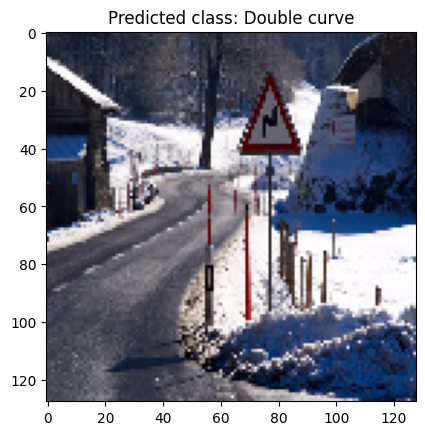

In [232]:
plt.imshow(test_img)
plt.title(f'Predicted class: {predicted_class_name}')
plt.show()